<a href="https://colab.research.google.com/github/abosedealli/LSTM-Multivariate-vs-Univariate/blob/main/stock_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing the libraries to Predict the closing price stock price 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
sns.set_style('whitegrid')
from datetime import datetime

## Tech stocks to use for analysis

---

11 S&P/ASX 200 stocks from five industry namely; Telecomms/Energy, Technology, Real Estate, Financial, and Healthcare.

Company_list = [AGL,ANZ,CPU, CSL, DXS, GMG, RMD, SHL,TLS, TNE, WBC]

Company_name = ["AGL Energy", "ANZ Bank","CSL", 

"Tesltra","Westpac Bank", "Goodman", "Dexus", " Technology One,"Computershare", "ResMed Inc", "Sonic Healthcare"]



All the dataset has following columns:

Date: Year-Month-Day

Open: The Price of the stock at the opening of the trading day($AU).

High:The highest price of the stock during the trading day($AU).

Low:The lowest price of the stock during the trading day($AU).

Close: The Price of the stock at the closing of the trading day($AU).

Adj Close: The price of the stock at the closing of the trading day adjusted with the dividends($AU).

Volume: The amount of traded stocks on the day ($AU).





**Loading the data for AGL**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/AGL_AX.csv")


In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3542 non-null   object 
 1   Open       3542 non-null   float64
 2   High       3542 non-null   float64
 3   Low        3542 non-null   float64
 4   Close      3542 non-null   float64
 5   Adj Close  3542 non-null   float64
 6   Volume     3542 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 193.8+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/12/2008,14.416293,14.416293,14.156540,14.193648,7.613944,332895
1,31/12/2008,14.175094,14.286417,13.980279,14.156540,7.594039,549227
2,2/01/2009,14.054495,14.240032,13.933895,14.054495,7.539299,367252
3,5/01/2009,14.054495,14.202925,13.349451,13.349451,7.161090,1294601
4,6/01/2009,13.451496,13.701973,13.284512,13.330897,7.151134,976516


In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/12/2008,14.416293,14.416293,14.156540,14.193648,7.613944,332895
1,31/12/2008,14.175094,14.286417,13.980279,14.156540,7.594039,549227
2,2/01/2009,14.054495,14.240032,13.933895,14.054495,7.539299,367252
3,5/01/2009,14.054495,14.202925,13.349451,13.349451,7.161090,1294601
4,6/01/2009,13.451496,13.701973,13.284512,13.330897,7.151134,976516
...,...,...,...,...,...,...,...
3537,22/12/2022,8.000000,8.190000,7.930000,8.140000,8.140000,2828366
3538,23/12/2022,8.130000,8.230000,8.070000,8.170000,8.170000,1745575
3539,28/12/2022,8.210000,8.240000,8.150000,8.220000,8.220000,1616651
3540,29/12/2022,8.210000,8.220000,8.150000,8.180000,8.180000,834343


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3542 non-null   object 
 1   Open       3542 non-null   float64
 2   High       3542 non-null   float64
 3   Low        3542 non-null   float64
 4   Close      3542 non-null   float64
 5   Adj Close  3542 non-null   float64
 6   Volume     3542 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 193.8+ KB


Question 1:
# What pattern of behaviour does the closing price of stock  for previous years and subsequent years has in common?

    #Assemble all closing stock as at last trading date for each year, and make comparison based on industry.
    # Combining all the closing prices and determine if there are correlation among/between companies within same industry.

In [7]:
closingdata_frame= pd.read_csv("/content/datasets.csv")
closingdata_frame

,Unnamed: 0,FINANCIALS,Unnamed: 2,REAL ESTATE,Unnamed: 4,Unnamed: 5,HEALTHCARE,Unnamed: 7,TELECOMMS,Unnamed: 9,TECHNOLOGY,Unnamed: 11
0,Date,WBC,ANZ,DXS,GMG,CSL,RMD,SHL,AGL,TLS,CPU,TNE
1,31/12/2008,16.86,15.29,4.68,3.36,33.7,2.68,14.56,14.15,3.83,7.8,0.79
2,31/12/2009,25.13,22.88,5.09,3.175,32.49,2.96,15.37,13.04,3.43,11.45,0.83
3,31/12/2010,22.06,23.35,4.76,3.25,36.29,3.49,11.6,14.12,2.79,10.78,0.96
4,31/12/2011,19.86,20.53,4.97,2.85,32,2.47,11.28,13.29,3.33,8.01,1
5,31/12/2012,25.86,25.05,6.08,4.33,53.9,3.94,13.33,14.74,4.37,8.99,1.5
6,31/12/2013,32.16,32.23,6.02,4.73,68.96,5.3,16.58,14.4,5.25,11.38,2.29
7,31/12/2014,32.94,32.09,6.97,5.68,86.68,6.94,18.5,13.36,5.97,11.8,3.2
8,31/12/2015,33.56,27.93,7.68,6.27,105.31,7.44,17.87,18.08,5.61,11.62,4.96
9,31/12/2016,32.6,30.42,9.62,7.08,100.41,8.58,21.4,22.09,5.1,12.46,5.65


In [8]:
closingdata_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16 non-null     object
 1   FINANCIALS   16 non-null     object
 2   Unnamed: 2   16 non-null     object
 3   REAL ESTATE  16 non-null     object
 4   Unnamed: 4   16 non-null     object
 5   Unnamed: 5   16 non-null     object
 6   HEALTHCARE   16 non-null     object
 7   Unnamed: 7   16 non-null     object
 8   TELECOMMS    16 non-null     object
 9   Unnamed: 9   16 non-null     object
 10  TECHNOLOGY   16 non-null     object
 11  Unnamed: 11  16 non-null     object
dtypes: object(12)
memory usage: 1.6+ KB


In [9]:
financial_data=pd.read_csv("/content/Financials.csv")
financial_data

,Date,WBC,ANZ
0,31/12/2008,16.86,15.29
1,31/12/2009,25.13,22.88
2,31/12/2010,22.06,23.35
3,31/12/2011,19.86,20.53
4,31/12/2012,25.86,25.05
5,31/12/2013,32.16,32.23
6,31/12/2014,32.94,32.09
7,31/12/2015,33.56,27.93
8,31/12/2016,32.60,30.42
9,31/12/2017,31.35,28.74


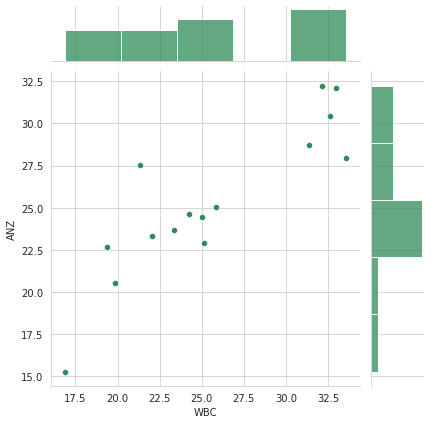

In [10]:
sns.jointplot(x='WBC', y='ANZ', data=financial_data, kind='scatter', color='seagreen')

From the table and chart, both stocks only shares a little correlation therefore are negatively correlated

**Trend of Closing stock from 2008-2022 for Healthcare Industry (CSL, RMD and SHL)**

In [12]:
Healthcare_dataframe=pd.read_csv("/content/HEALTHCARE.csv")
Healthcare_dataframe

,Date,CSL,RMD,SHL
0,31/12/2008,33.70,2.68,14.56
1,31/12/2009,32.49,2.96,15.37
2,31/12/2010,36.29,3.49,11.60
3,31/12/2011,32.00,2.47,11.28
4,31/12/2012,53.90,3.94,13.33
5,31/12/2013,68.96,5.30,16.58
6,31/12/2014,86.68,6.94,18.50
7,31/12/2015,105.31,7.44,17.87
8,31/12/2016,100.41,8.58,21.40
9,31/12/2017,141.30,10.99,22.86


CSL ANNUAL CLOSING STOCK FROM 2008 TO 2022

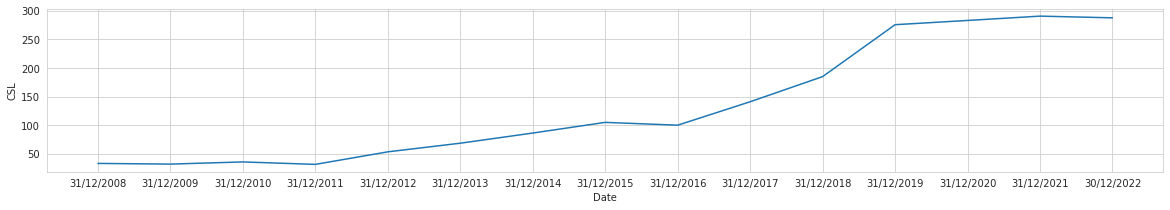

In [13]:
plot = pd.DataFrame ({"plot_date": ['31/12/2008', '31/12/2009', '31/12/2010', '31/12/2011', '31/12/2012', '31/12/2013', '31/12/2014', '31/12/2015', '31/12/2016', '31/12/2017', '31/12/2018', '31/12/2019', '31/12/2020', '31/12/2021', '31/12/2022'],
"plot_no": [33.70, 32.49, 36.29, 32, 53.90, 68.96, 86.68, 105.31, 100.41, 141.30, 186.16, 275.76, 283.18, 290.72, 287.76]})
plt.figure (figsize = (20, 3))
sns.lineplot (x = 'Date', y = 'CSL', data = Healthcare_dataframe)
plt.show ()

RMD ANNUAL CLOSING STOCK FROM 2008 TO 2022

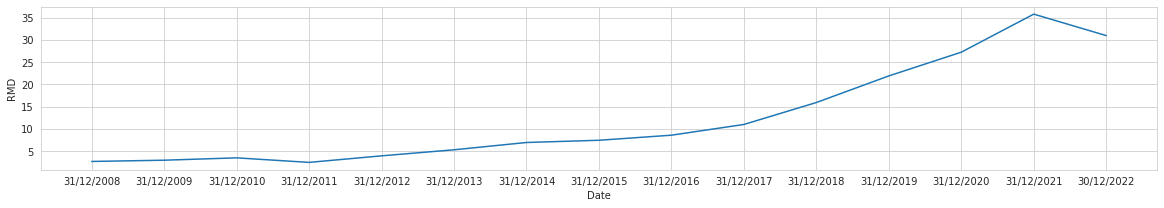

In [14]:
plot = pd.DataFrame ({"plot_date": ['31/12/2008', '31/12/2009', '31/12/2010', '31/12/2011', '31/12/2012', '31/12/2013', '31/12/2014', '31/12/2015', '31/12/2016', '31/12/2017', '31/12/2018', '31/12/2019', '31/12/2020', '31/12/2021', '31/12/2022'],
"plot_no": [2.68, 2.96, 3.49,2.47,3.94,5.30,6.94,7.44,8.58,10.99,15.92,21.90,27.23,35.78,30.96]})
plt.figure (figsize = (20, 3))
sns.lineplot (x = 'Date', y = 'RMD', data = Healthcare_dataframe)
plt.show ()

SHL ANNUAL CLOSING STOCK FROM 2008 TO 2022

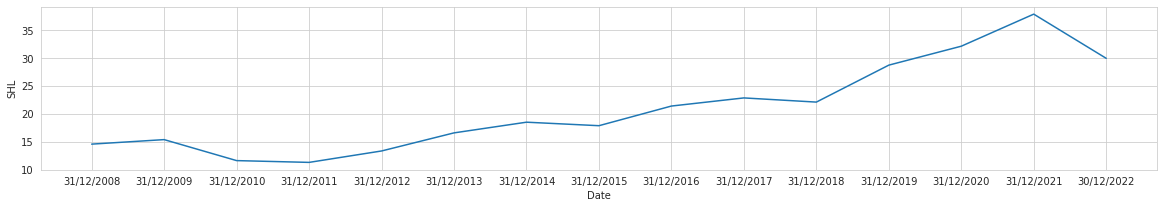

In [15]:
plot = pd.DataFrame ({"plot_date": ['31/12/2008', '31/12/2009', '31/12/2010', '31/12/2011', '31/12/2012', '31/12/2013', '31/12/2014', '31/12/2015', '31/12/2016', '31/12/2017', '31/12/2018', '31/12/2019', '31/12/2020', '31/12/2021', '31/12/2022'],
"plot_no": [14.56, 15.37, 11.60,11.28,13.33,16.58,18.50,17.87, 21.40,22.86, 22.11,28.75,32.15,37.91,29.97]})
plt.figure (figsize = (20, 3))
sns.lineplot (x = 'Date', y = 'SHL', data = Healthcare_dataframe)
plt.show ()

From the above lineplots,all the three stocks from the healthcare industry have been increasing. While CSL and RML has over 2008- 2022 recorded over times 10 closing stock price increase, they are said to be positively correlated.

Since SHL has recorded at least times 2 increase, it shares a positive correlation with CSL.
It also shares positive correlation with RMD. 

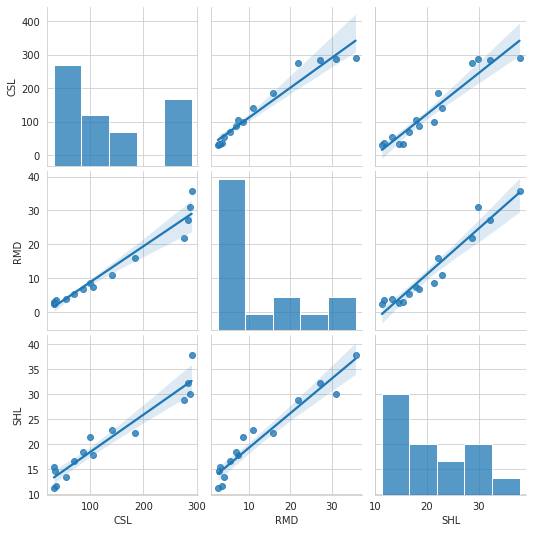

In [16]:
sns.pairplot(Healthcare_dataframe, kind='reg')

**Trend of Closing stock from 2008-2022 for Real Estate Industry (GMG and DXS)**

In [17]:
realestate_dataframe=pd.read_csv("/content/realestate-frame.csv")
realestate_dataframe

,Date,DXS,GMG
0,31/12/2008,4.68,3.360
1,31/12/2009,5.09,3.175
2,31/12/2010,4.76,3.250
3,31/12/2011,4.97,2.850
4,31/12/2012,6.08,4.330
5,31/12/2013,6.02,4.730
6,31/12/2014,6.97,5.680
7,31/12/2015,7.68,6.270
8,31/12/2016,9.62,7.080
9,31/12/2017,9.75,8.390


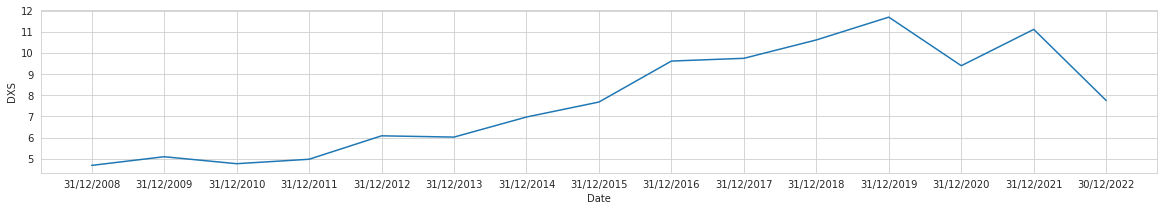

In [21]:
plot = pd.DataFrame ({"plot_date": ['31/12/2008', '31/12/2009', '31/12/2010', '31/12/2011', '31/12/2012', '31/12/2013', '31/12/2014', '31/12/2015', '31/12/2016', '31/12/2017', '31/12/2018', '31/12/2019', '31/12/2020', '31/12/2021', '31/12/2022'],
"plot_no": [4.68, 5.09, 4.76, 4.97, 6.08,6.02,6.97,7.68, 9.62, 9.75, 10.62,11.70, 9.40, 11.12, 7.75 ]})
plt.figure (figsize = (20, 3))
sns.lineplot (x = 'Date', y = 'DXS', data = realestate_dataframe)
plt.show ()

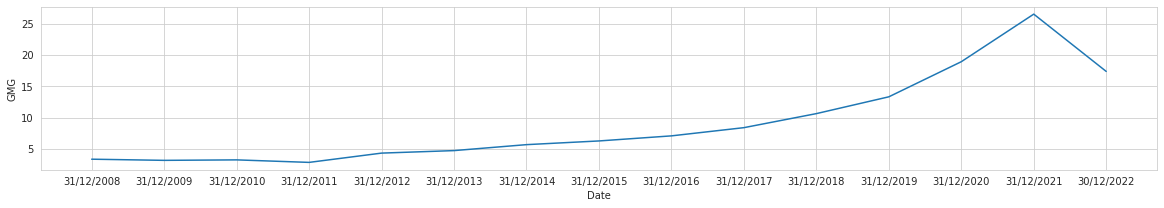

In [20]:
plot = pd.DataFrame ({"plot_date": ['31/12/2008', '31/12/2009', '31/12/2010', '31/12/2011', '31/12/2012', '31/12/2013', '31/12/2014', '31/12/2015', '31/12/2016', '31/12/2017', '31/12/2018', '31/12/2019', '31/12/2020', '31/12/2021', '31/12/2022'],
"plot_no": [3.36, 3.175,3.25,2.85, 4.33,4.73,5.68, 6.27,7.08, 8.39, 10.63, 13.31, 18.91, 26.5, 17.36]})
plt.figure (figsize = (20, 3))
sns.lineplot (x = 'Date', y = 'GMG', data = realestate_dataframe)
plt.show ()

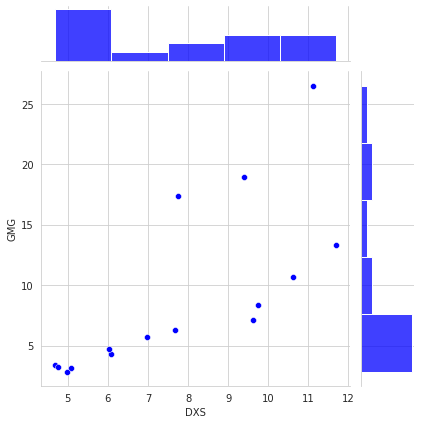

In [19]:
sns.jointplot(x='DXS', y='GMG', data=realestate_dataframe, kind='scatter', color='blue')

The correlation between company within real estae is not a strong one but might require further analysis.

Trend of Closing stock from 2008-2022 for Telecomms/Energy Industry (TLS and AGL)



In [18]:
df_telecomms=pd.read_csv("/content/telecomms.csv")
df_telecomms

,Date,AGL,TLS
0,31/12/2008,14.15,3.83
1,31/12/2009,13.04,3.43
2,31/12/2010,14.12,2.79
3,31/12/2011,13.29,3.33
4,31/12/2012,14.74,4.37
5,31/12/2013,14.40,5.25
6,31/12/2014,13.36,5.97
7,31/12/2015,18.08,5.61
8,31/12/2016,22.09,5.10
9,31/12/2017,24.36,3.63


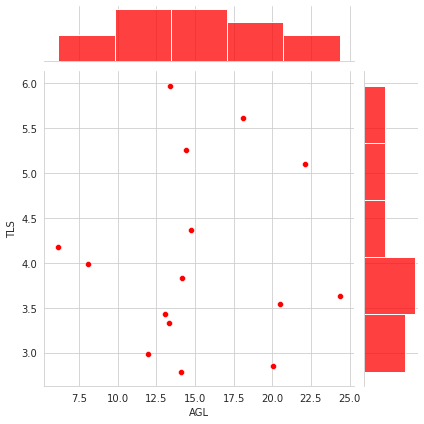

In [22]:
sns.jointplot(x='AGL', y='TLS', data=df_telecomms, kind='scatter', color='red')

Based on the scatterplot, the correlation is negative and need further analysis as there is no consistency in the increase or decrease relation betwen each company stock thus are independent of one another.

**Trend of Closing stock from 2008-2022 for Technology Industry (TNE and CPU)**

In [23]:
df_tech=pd.read_csv("/content/echnology.csv")
df_tech

,Date,CPU,TNE
0,31/12/2008,7.80,0.79
1,31/12/2009,11.45,0.83
2,31/12/2010,10.78,0.96
3,31/12/2011,8.01,1.00
4,31/12/2012,8.99,1.50
5,31/12/2013,11.38,2.29
6,31/12/2014,11.80,3.20
7,31/12/2015,11.62,4.96
8,31/12/2016,12.46,5.65
9,31/12/2017,16.30,4.96


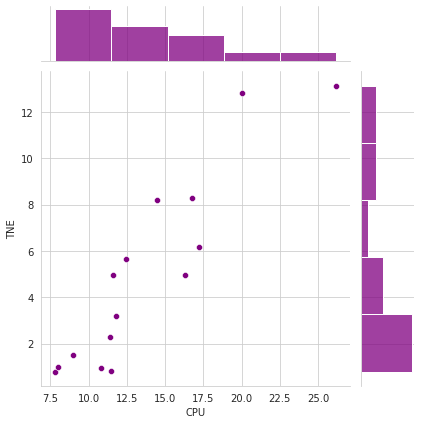

In [24]:
sns.jointplot(x='CPU', y='TNE', data=df_tech, kind='scatter', color='purple')

From the above, the two company within the technology industry have positive correlation.

From all comparison above, the healthcare industry has the highest correlation thus below correlation plot shows the exact numerical value of their positive correlation. 

Text(0.5, 1.0, 'Correlation between Heathcare company annual closing price')

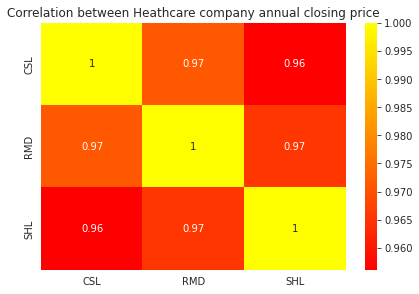

In [25]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(Healthcare_dataframe.corr(), annot=True, cmap='autumn')
plt.title('Correlation between Heathcare company annual closing price')



The answer to the research question "What pattern of behaviour does the closing price of stock for previous years and subsequent years has in common" is that companies within the healthacre industry tends to be positively correlated in terms of increasing in closing price of stock over the years and the increase is consistent subject to data analysed.





**Data preprocessing** 

In [26]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.40061528],
       [0.3902322 ],
       [0.38504068],
       ...,
       [0.13344813],
       [0.13344813],
       [0.13301765]])

In [27]:
data_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3542 non-null   float64
dtypes: float64(1)
memory usage: 27.8 KB


In [28]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.39605902],
       [0.39047776],
       [0.38848442],
       ...,
       [0.13064032],
       [0.12978084],
       [0.13021058]])

In [29]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.39896654],
       [0.39120174],
       [0.38915839],
       ...,
       [0.13436124],
       [0.13436124],
       [0.13083701]])

In [ ]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [30]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.16274641],
       [0.16153898],
       [0.15821847],
       ...,
       [0.19950952],
       [0.19708314],
       [0.19041058]])

In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

ANZ stocks

In [31]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.40061528],
       [0.3902322 ],
       [0.38504068],
       ...,
       [0.13344813],
       [0.13344813],
       [0.13301765]])

In [32]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.39605902],
       [0.39047776],
       [0.38848442],
       ...,
       [0.13064032],
       [0.12978084],
       [0.13021058]])

In [33]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.39896654],
       [0.39120174],
       [0.38915839],
       ...,
       [0.13436124],
       [0.13436124],
       [0.13083701]])

In [34]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.38961644],
       [0.38802655],
       [0.38365444],
       ...,
       [0.13367609],
       [0.13196229],
       [0.12724935]])

In [35]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.16274641],
       [0.16153898],
       [0.15821847],
       ...,
       [0.19950952],
       [0.19708314],
       [0.19041058]])

In [36]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.00271111],
       [0.00627686],
       [0.00327741],
       ...,
       [0.02387093],
       [0.01097635],
       [0.01919173]])

CPU stock



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/CPU_AX.csv")
data

In [37]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.40061528],
       [0.3902322 ],
       [0.38504068],
       ...,
       [0.13344813],
       [0.13344813],
       [0.13301765]])

In [38]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.39605902],
       [0.39047776],
       [0.38848442],
       ...,
       [0.13064032],
       [0.12978084],
       [0.13021058]])

In [39]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.39896654],
       [0.39120174],
       [0.38915839],
       ...,
       [0.13436124],
       [0.13436124],
       [0.13083701]])

In [40]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.16274641],
       [0.16153898],
       [0.15821847],
       ...,
       [0.19950952],
       [0.19708314],
       [0.19041058]])

In [41]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.00271111],
       [0.00627686],
       [0.00327741],
       ...,
       [0.02387093],
       [0.01097635],
       [0.01919173]])

CSL stocks



In [42]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/CSL_AX.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/12/2008,32.799999,33.500000,32.669998,33.220001,26.371035,639318
1,31/12/2008,33.150002,33.799999,33.070000,33.700001,26.752081,721811
2,2/01/2009,34.000000,34.000000,33.119999,33.639999,26.704449,653048
3,5/01/2009,33.610001,33.669998,31.680000,31.799999,25.243801,1964115
4,6/01/2009,32.189999,32.480000,31.170000,31.270000,24.823071,1651644
...,...,...,...,...,...,...,...
3537,22/12/2022,288.299988,290.769989,287.160004,290.769989,290.769989,492089
3538,23/12/2022,291.309998,293.000000,287.640015,289.000000,289.000000,442032
3539,28/12/2022,286.500000,288.190002,284.119995,285.570007,285.570007,377295
3540,29/12/2022,285.369995,286.899994,284.250000,285.700012,285.700012,386665


In [43]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.02013294],
       [0.02125144],
       [0.02396779],
       ...,
       [0.83088326],
       [0.8272721 ],
       [0.83385524]])

In [44]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.02193336],
       [0.02288217],
       [0.02351471],
       ...,
       [0.8274428 ],
       [0.82336289],
       [0.82772743]])

In [45]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.02106718],
       [0.02235373],
       [0.02251455],
       ...,
       [0.82982212],
       [0.83024026],
       [0.83792742]])

In [46]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.02208242],
       [0.02360754],
       [0.02341689],
       ...,
       [0.82388081],
       [0.82429388],
       [0.83083916]])

In [47]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.01414722],
       [0.01538304],
       [0.01522856],
       ...,
       [0.85478509],
       [0.85520672],
       [0.86188774]])

In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

**Scaling DXS Stock features**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/DXS_AX.csv")
data

In [ ]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [48]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.02205984],
       [0.02532401],
       [0.02260312],
       ...,
       [0.01169183],
       [0.01206259],
       [0.01372619]])

Loading GMG data for scaling

In [49]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/GMG_AX.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/12/2008,3.223978,3.405610,3.223978,3.360202,2.111440,2303626
1,31/12/2008,3.223978,3.405610,3.223978,3.360202,2.111440,2303626
2,2/01/2009,3.314794,3.382906,3.246682,3.360202,2.111440,1240859
3,5/01/2009,3.382906,3.428315,3.314794,3.360202,2.111440,1557014
4,6/01/2009,3.405610,3.451019,3.360202,3.405610,2.139973,1899412
...,...,...,...,...,...,...,...
3537,22/12/2022,17.700001,17.730000,17.445000,17.730000,17.577330,3107194
3538,23/12/2022,17.500000,17.530001,17.424999,17.430000,17.279915,1791167
3539,28/12/2022,17.260000,17.530001,17.250000,17.420000,17.270000,1721809
3540,29/12/2022,17.219999,17.430000,17.080000,17.370001,17.370001,3425925


In [50]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.09627656],
       [0.09627656],
       [0.09974598],
       ...,
       [0.63249024],
       [0.6309621 ],
       [0.64929946]])

In [51]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

array([[0.09978721],
       [0.09978721],
       [0.0989195 ],
       ...,
       [0.63959987],
       [0.63577799],
       [0.64686131]])

In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

**Loading RMD datasaet feature scaling **

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/RMD_AX.csv") 
data

In [ ]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


In [ ]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


In [ ]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


In [ ]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


**Loading and Scaling features for SHL **

In [ ]:
data = pd.read_csv ("/content/drive/MyDrive/SIT723 DOCS/Historical Data/SHL_AX.csv")
data

In [ ]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Adj Close"])
data_closes=data_close.values
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/TLS_AX.csv")
data

In [ ]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["High"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Close"])
data_closes=data_close.values
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler (feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

Loading TNE data 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/TNE_AX.csv")
data

In [ ]:
data_close=data.filter(["Open"])
data_closes=data_close.values
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler (feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["High"])
data_closes=data_close.values
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler (feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

**Load WBC dataset for feature scaling**

In [ ]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
data=pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/WBC_AX.csv")
data

In [ ]:
data_close=data.filter(["Open"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["High"])
data_closes=data_close.values
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler (feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data


In [ ]:
data_close=data.filter(["Low"])  
data_closes=data_close.values                
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

In [ ]:
data_close=data.filter(["Close"])
data_closes=data_close.values
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler (feature_range= (0,1))
Scales_dataWBC2=Scaler.fit_transform(data_closes)
Scales_dataWBC2

In [ ]:
data_close=data.filter(["Adj Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_dataWBC=Scaler.fit_transform(data_closes)
Scales_dataWBC


In [ ]:
data_close=data.filter(["Volume"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_data=Scaler.fit_transform(data_closes)
Scales_data

**Split** dataset to train and test start with WBC stock- Westpac Bank 


In [ ]:

data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_dataWBC2=Scaler.fit_transform(data_closes)
Scales_dataWBC2

In [61]:
Scales_dataWBC2 = pd.read_csv("/content/drive/MyDrive/SIT723 DOCS/Historical Data/WBC_AX.csv")
Scales_dataWBC2

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/12/2008,16.636738,16.855249,16.547344,16.855249,8.094463,3044164
1,31/12/2008,16.636738,16.855249,16.547344,16.855249,8.094463,3044046
2,2/01/2009,16.775789,17.024099,16.497683,16.646669,7.994293,3655805
3,5/01/2009,16.805588,16.944639,16.388428,16.527479,7.937055,5161118
4,6/01/2009,16.845318,16.914843,16.626804,16.914843,8.123080,4922125
...,...,...,...,...,...,...,...
3537,22/12/2022,23.639999,23.760000,23.469999,23.549999,23.549999,8021837
3538,23/12/2022,23.400000,23.525000,23.379999,23.500000,23.500000,2705357
3539,28/12/2022,23.500000,23.600000,23.389999,23.490000,23.490000,3424307
3540,29/12/2022,23.490000,23.490000,23.090000,23.270000,23.270000,3645448


In [62]:
data_close=data.filter(["Close"])  
data_closes=data_close.values                     
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range= (0,1))
Scales_dataWBC2=Scaler.fit_transform(data_closes)

Scales_dataWBC2

array([[0.10117148],
       [0.10117148],
       [0.10117148],
       ...,
       [0.63665691],
       [0.63475264],
       [0.63437177]])

In [63]:
##This is to split dataset into train and test


training_size = int(len(Scales_dataWBC2)*0.80)  #80% of scales_data is given as the training dataset
test_size = len(Scales_dataWBC2) - training_size  #whilst 20% remaining makes uo the test data
training_data = Scales_dataWBC2[0:training_size, :]
test_data = Scales_dataWBC2[training_size : len(Scales_dataWBC2), :1]


     

In [64]:
training_size, test_size

(2833, 709)

In [65]:
training_data

array([[0.10117148],
       [0.10117148],
       [0.10117148],
       ...,
       [0.50754442],
       [0.47859884],
       [0.49726112]])

In [158]:
def create_mydataset(dataset, step=1):  #this will enable dataset values into a matrix
    Xstockdata, Ystockdata = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xstockdata.append(a)
        Ystockdata.append(dataset[i+step, 0])

    return np.array(Xstockdata), np.array(Ystockdata)

In [67]:
# Reshaping X and Y

time_step=100
X_train, y_train=create_mydataset(training_data, time_step)
X_test, ytest=create_mydataset(test_data, time_step)

In [68]:
print(X_train.shape), print (y_train.shape)

(2732, 100)
(2732,)


(None, None)

In [69]:
print(X_test.shape), print (ytest.shape)

(608, 100)
(608,)


(None, None)

In [70]:
#Reshaping input for LSTM model

X_train=X_train.reshape (X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape (X_test.shape[0], X_test.shape[1], 1)
X_train.shape
X_test.shape

(608, 100, 1)

In [71]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

**Building the model**

In [72]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(units=1, activation='linear'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 149,057
Trainable params: 149,057
Non-trainable params: 0
_________________________________________________________________


In [73]:
mse='mean_squared_loss'
model.compile(loss='mse',optimizer ='adam')
model.fit(X_train, y_train,validation_data=(X_test, ytest), epochs=100,batch_size=64, verbose=1)

Epoch 1/100
43/43 [==============================] - 17s 297ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 2/100
43/43 [==============================] - 11s 251ms/step - loss: 1.1834e-04 - val_loss: 0.0014
Epoch 3/100
43/43 [==============================] - 11s 246ms/step - loss: 9.1721e-05 - val_loss: 0.0014
Epoch 4/100
43/43 [==============================] - 10s 243ms/step - loss: 1.0577e-04 - val_loss: 0.0017
Epoch 5/100
43/43 [==============================] - 11s 244ms/step - loss: 9.9649e-05 - val_loss: 0.0015
Epoch 6/100
43/43 [==============================] - 10s 242ms/step - loss: 8.7917e-05 - val_loss: 0.0012
Epoch 7/100
43/43 [==============================] - 10s 243ms/step - loss: 9.9998e-05 - val_loss: 0.0014
Epoch 8/100
43/43 [==============================] - 10s 244ms/step - loss: 1.0046e-04 - val_loss: 0.0013
Epoch 9/100
43/43 [==============================] - 10s 244ms/step - loss: 1.1222e-04 - val_loss: 0.0011
Epoch 10/100
43/43 [==============================

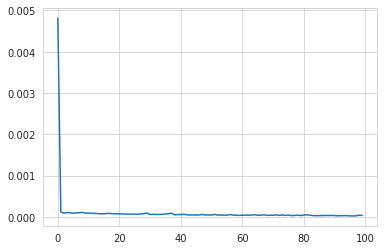

In [74]:
loss=model.history.history['loss']
plt.plot(loss)

 The plot above for loss revealed that the loss decreased significantly, there was no overfitting but model trained well

#predicting using train and test dataset

In [75]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 1s 48ms/step


In [76]:
import tensorflow as tf


In [77]:
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

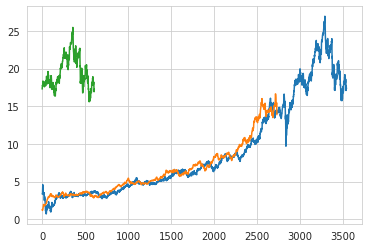

In [78]:
##Compare visuals using WestPacBank dataset 
plt.plot(Scaler.inverse_transform(Scales_dataWBC2))
plt.plot(train_predict)
plt.plot(test_predict)

In [79]:
type(train_predict)

numpy.ndarray

In [80]:
#Check the rmse
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7.02550265050625

In [81]:
math.sqrt(mean_squared_error(ytest,test_predict))

18.884248249871934

In [82]:
test = np.vstack((train_predict,test_predict))

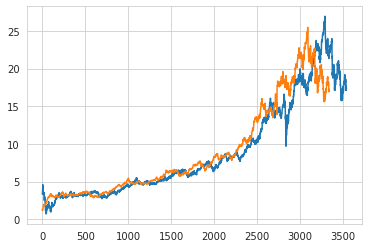

In [83]:
plt.plot(Scaler.inverse_transform(Scales_dataWBC2))
plt.plot(test)

In [84]:
test_size

709

In [85]:
#test previous 100days
x_inputted=test_data[609:].reshape(1,-1)
x_inputted.shape

(1, 100)

In [86]:
x_inputted=x_inputted.reshape(1,-1)

In [87]:
temp_inputted=list (x_inputted)

In [88]:
x_inputted.shape

(1, 100)

In [89]:
temp_inputted=temp_inputted[0].tolist()   #this creates a list of last 100 dataset

In [90]:
from numpy import array
lst_output=[]           ##predicting 30 and 60days  price
n_steps=100
i=0
while(i<60):

   if(len(temp_inputted)>100):
        #print(temp_inputted)
        x_inputted=np.array(temp_inputted[1:])
        print("{} day input {}".format(i,x_inputted))
        x_inputted=x_inputted.reshape(1,-1)
        x_inputted = x_inputted.reshape((1,n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_inputted, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_inputted.extend(yhat[0].tolist())
        temp_inputted=temp_inputted[1:]
        #print(temp_inputted)
        lst_output.extend(yhat.tolist())
        i=i+1
   else:
        x_inputted = x_inputted.reshape((1, n_steps,1))
        yhat = model.predict(x_inputted, verbose=0)
        print(yhat[0])
        temp_inputted.extend(yhat[0].tolist())
        print(len(temp_inputted))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)



[0.6241258]
101
1 day input [0.76424595 0.74215595 0.7596756  0.75586693 0.77529094 0.77452929
 0.7535818  0.74253681 0.72539795 0.71016343 0.74025156 0.75472438
 0.7398707  0.74063246 0.72235104 0.7033079  0.70483132 0.69112029
 0.68997771 0.68121786 0.70673567 0.69873751 0.70368877 0.72273191
 0.68502653 0.66979201 0.65112966 0.65379578 0.65265315 0.64160809
 0.61685204 0.61228173 0.59628549 0.58638302 0.59133424 0.57419541
 0.57648059 0.61075824 0.63132487 0.61494773 0.60009404 0.58790643
 0.57800404 0.58105094 0.57267196 0.58295525 0.58371702 0.60618792
 0.60961561 0.60237926 0.57952749 0.59361945 0.60390267 0.6187564
 0.61799463 0.6111391  0.62066067 0.64541676 0.6248502  0.61951805
 0.614186   0.61989895 0.6218033  0.62561185 0.62942052 0.66903025
 0.66522162 0.65417656 0.65455743 0.66560249 0.67245805 0.66331735
 0.6644599  0.6675068  0.68007523 0.68807339 0.69340547 0.68502653
 0.70140363 0.70445053 0.67436233 0.68654994 0.67855182 0.65874695
 0.6675068  0.66560249 0.66636425 0

In [95]:
len(Scales_dataWBC2)

3542

In [119]:
day_new=np.arange(1,101)
day_pred=np.arange(101, 161)
                   
import matplotlib.pyplot as plt

In [123]:
Scaler.inverse_transform(lst_output)

array([[17.09098042],
       [16.92090202],
       [16.71885087],
       [16.51857442],
       [16.33063479],
       [16.15942646],
       [16.00627655],
       [15.87053559],
       [15.75048365],
       [15.64410973],
       [15.54964851],
       [15.46580887],
       [15.39182554],
       [15.32736674],
       [15.27238551],
       [15.22692412],
       [15.19099352],
       [15.1644779 ],
       [15.14706582],
       [15.1382784 ],
       [15.13746304],
       [15.14386385],
       [15.15664825],
       [15.17496646],
       [15.19797494],
       [15.22487085],
       [15.25489518],
       [15.28736246],
       [15.32162792],
       [15.35711719],
       [15.39329193],
       [15.42966856],
       [15.46580574],
       [15.50130284],
       [15.53578896],
       [15.56893701],
       [15.6004606 ],
       [15.63009837],
       [15.65765159],
       [15.68293713],
       [15.70581884],
       [15.7262044 ],
       [15.74402651],
       [15.75926325],
       [15.77191306],
       [15

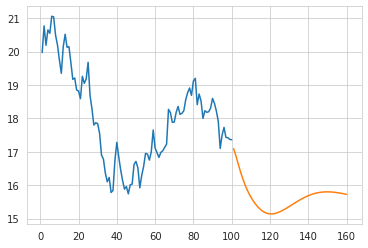

In [107]:
plt.plot(day_new,Scaler.inverse_transform(Scales_dataWBC2[3442:]))
plt.plot(day_pred,Scaler.inverse_transform(lst_output))
plt.savefig('60daypredict.png')

In [156]:
Scaled_new = (Scales_dataWBC2.tolist())


In [126]:
len(Scales_dataWBC2.tolist())

3542

In [154]:
plt.plot=Scaler.inverse_transform(lst_output)

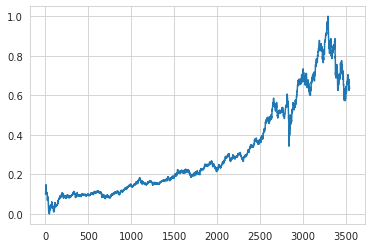

In [102]:
plt.plot(Scales_dataWBC2)